In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import distance_metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB


In [2]:
data = pd.read_csv('../../../DATA/Concatination_of_ters/Without_Индекс стоимости жизни/classes.csv').dropna()

In [3]:
X, y = data.drop('Средняя численность работников, включая внешних совместителей',
                 axis=1), data['Средняя численность работников, включая внешних совместителей']
X_balanced, y_balanced = SMOTE().fit_resample(X, y)


In [4]:
X_balanced['Средняя численность работников, включая внешних совместителей'] = y_balanced


In [5]:
data_smoted = X_balanced

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_smoted.drop('Средняя численность работников, включая внешних совместителей', axis=1),
                                                    data_smoted['Средняя численность работников, включая внешних совместителей'], test_size=0.5, random_state=42)


In [7]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.46      0.71      0.56        41
        True       0.52      0.28      0.36        47

    accuracy                           0.48        88
   macro avg       0.49      0.49      0.46        88
weighted avg       0.49      0.48      0.45        88



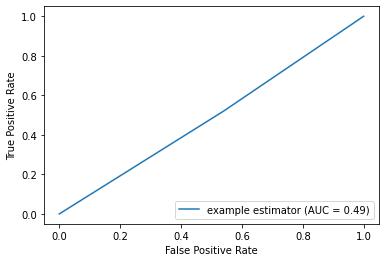

In [9]:
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
